In [1]:
# Spam Email Detection Model

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [3]:
#Data Collection & Pre-processing 

In [4]:
#loading the data from csv file to a pandas DataFrame

mail_data=pd.read_csv('mail_data.csv')

In [5]:
mail_data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
#replacing all null values with a null string

mail_data2=mail_data.where((pd.notnull(mail_data)),'')

In [7]:
#printing first 10 rows of this dataframe
mail_data2.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [8]:
#checking the number of rows and columns in dataframe

mail_data2.shape

(5572, 2)

In [9]:
#Label Encoding 
#labeling spam mail as 0; ham mail as 1

mail_data2.loc[mail_data['Category']=='spam','Category',]=0
mail_data2.loc[mail_data['Category']=='ham','Category',]=1

In [10]:
mail_data2

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will ü b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


In [11]:
#spam emails are represented as 0 and ham mails as 1

In [12]:
#seperating the data as text and label

X=mail_data2['Message']
Y=mail_data2['Category']

In [13]:
print("All Messages are : ", X)
print("Categories : ",Y)

All Messages are :  0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object
Categories :  0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


In [14]:
#splitting data into training and test data

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=3)
#random_state makes sure that each time splitting of data is done in a different manner

In [15]:
print("Shape of X :", X.shape)
print("Shape of X-Train :",X_train.shape)
print("Shape of X-Test :",X_test.shape)

Shape of X : (5572,)
Shape of X-Train : (4457,)
Shape of X-Test : (1115,)


In [16]:
#Feature Extraction 

#transforming the text data to feature vectors that can be used as input to Logistic Regression 
feature_extraction = TfidfVectorizer(min_df = 1,stop_words='english',lowercase=True)

X_train_features=feature_extraction.fit_transform(X_train)
X_test_features=feature_extraction.transform(X_test)


#converting Y_train and Y_test as integers

Y_train=Y_train.astype('int')
Y_test=Y_test.astype('int')



In [17]:
#Trainig the model 

#Logistic Regression

model=LogisticRegression()


In [18]:
#training the logistic Regresion model with the trainig data

model.fit(X_train_features,Y_train)


LogisticRegression()

In [19]:
#prediction on trainig data

prediction_on_training_data = model.predict(X_train_features)


#comparing how accurate the prediction is made by the model 
accuracy_on_training_data=accuracy_score(Y_train,prediction_on_training_data)

print("Accuracy on training data :" ,accuracy_on_training_data)

Accuracy on training data : 0.9670181736594121


In [20]:
#prediction on test data

prediction_on_test_data = model.predict(X_test_features)


#comparing how accurate the prediction is made by the model 
accuracy_on_test_data=accuracy_score(Y_test,prediction_on_test_data)

print("Accuracy on test data :" ,accuracy_on_test_data)

Accuracy on test data : 0.9659192825112107


In [21]:
#Building a Predictive System 

input_mail=["U dun say so early hor... U c already then say..."]
#convert text to feature vectors
input_data_features=feature_extraction.transform(input_mail)


#making prediction
prediction=model.predict(input_data_features)
if prediction==0:
    print("Its a spam email")
else: 
    print("Its a Ham Email")


Its a Ham Email


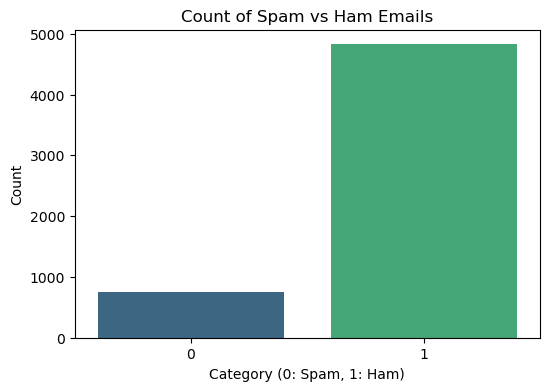

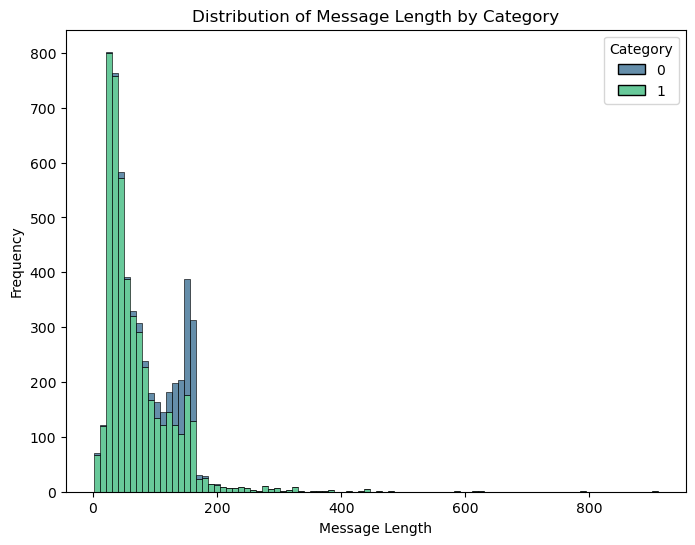

In [22]:

#Data Visulaization 


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming mail_data2 is your DataFrame

# Count of spam vs ham
plt.figure(figsize=(6,4))
sns.countplot(x='Category', data=mail_data2, palette='viridis')
plt.title('Count of Spam vs Ham Emails')
plt.xlabel('Category (0: Spam, 1: Ham)')
plt.ylabel('Count')
plt.show()

# Optionally, if you want to visualize the length of messages
mail_data2['Message Length'] = mail_data2['Message'].apply(len)

plt.figure(figsize=(8,6))
sns.histplot(data=mail_data2, x='Message Length', hue='Category', multiple='stack', palette='viridis')
plt.title('Distribution of Message Length by Category')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()


In [23]:

import pandas as pd
import matplotlib.pyplot as plt



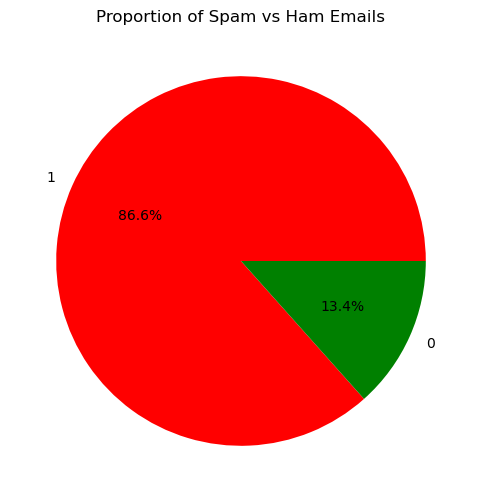

In [24]:
plt.figure(figsize=(6, 6))
mail_data2['Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['red', 'green'])
plt.title('Proportion of Spam vs Ham Emails')
plt.ylabel('')
plt.show()


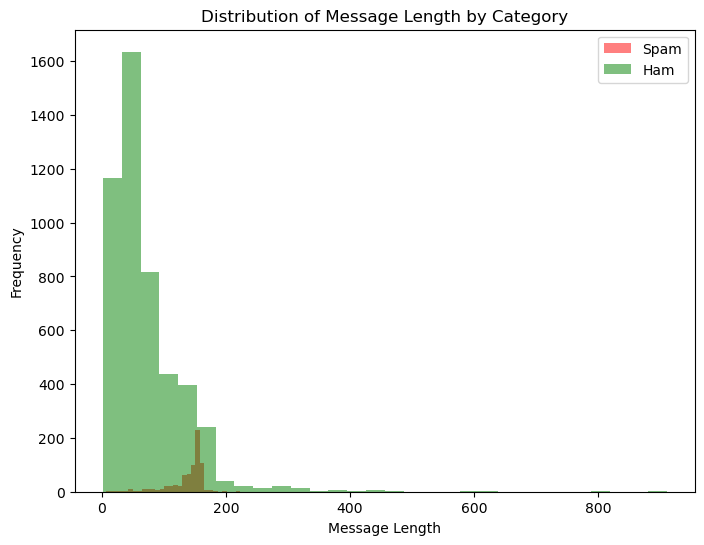

In [25]:
plt.figure(figsize=(8, 6))
plt.hist(mail_data2[mail_data2['Category'] == 0]['Message Length'], bins=30, alpha=0.5, label='Spam', color='red')
plt.hist(mail_data2[mail_data2['Category'] == 1]['Message Length'], bins=30, alpha=0.5, label='Ham', color='green')
plt.title('Distribution of Message Length by Category')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()


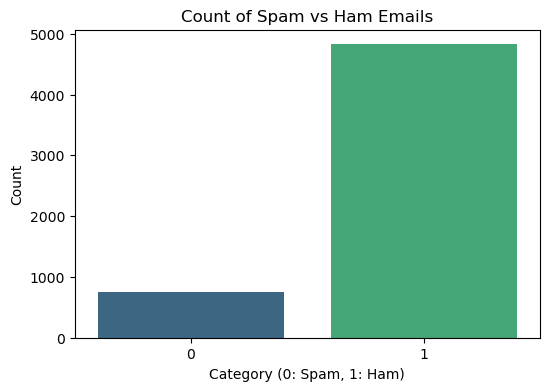

In [26]:
 #Count of Spam vs Ham Emails
 #This plot shows the distribution of spam and ham emails in your dataset.
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='Category', data=mail_data2, palette='viridis')
plt.title('Count of Spam vs Ham Emails')
plt.xlabel('Category (0: Spam, 1: Ham)')
plt.ylabel('Count')
plt.show()

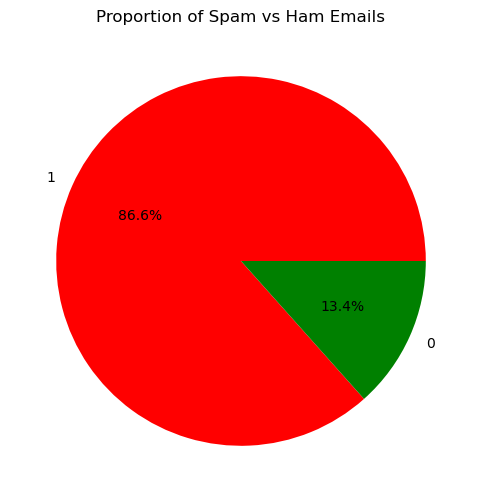

In [32]:

plt.figure(figsize=(6, 6))
mail_data2['Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['red', 'green'])
plt.title('Proportion of Spam vs Ham Emails')
plt.ylabel('')
plt.show()


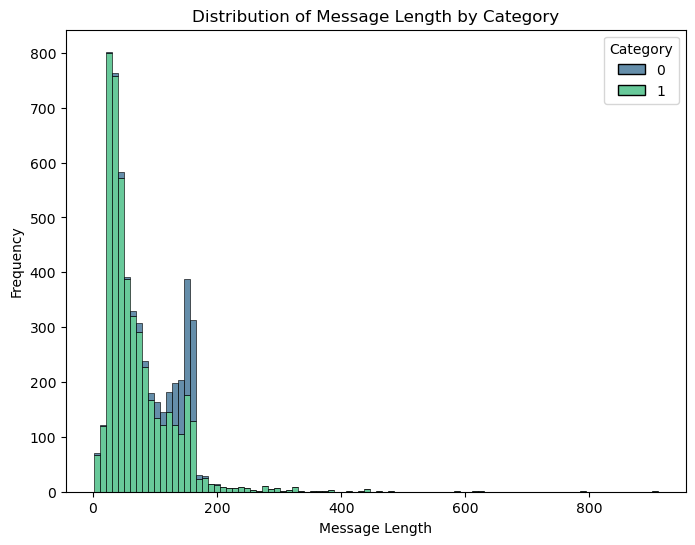

In [33]:
mail_data2['Message Length'] = mail_data2['Message'].apply(len)

plt.figure(figsize=(8, 6))
sns.histplot(data=mail_data2, x='Message Length', hue='Category', multiple='stack', palette='viridis')
plt.title('Distribution of Message Length by Category')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()


<Axes: >

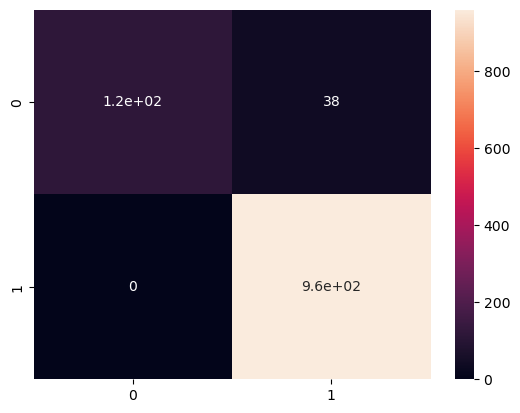

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,prediction_on_test_data)
import seaborn as sns
sns.heatmap(confusion_matrix(Y_test,prediction_on_test_data),annot=True)

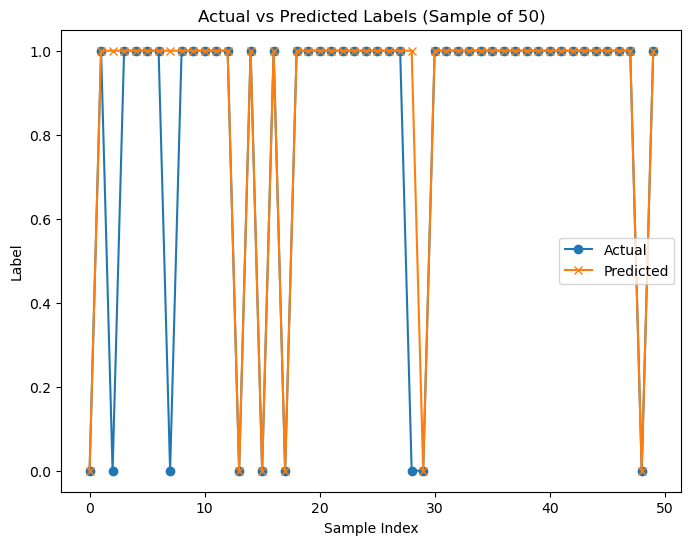

In [34]:

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(Y_test.values[:50], label='Actual', marker='o')
plt.plot(prediction_on_test_data[:50], label='Predicted', marker='x')
plt.title('Actual vs Predicted Labels (Sample of 50)')
plt.xlabel('Sample Index')
plt.ylabel('Label')
plt.legend()
plt.show()


In [31]:
import tkinter as tk
from tkinter import messagebox
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Load the trained model and vectorizer
model = LogisticRegression()
model.fit(X_train_features, Y_train)

vectorizer = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
vectorizer.fit(X_train)

# Function to predict whether the message is spam or ham
def predict_spam():
    message = entry.get()
    if message.strip() == "":
        messagebox.showerror("Input Error", "Please enter a message to classify.")
        return
    
    # Transform the message using the vectorizer
    transformed_message = vectorizer.transform([message])
    
    # Predict using the loaded model
    prediction = model.predict(transformed_message)[0]
    
    # Display the result
    if prediction == 0:
        result_label.config(text="It's a Spam Email.", fg="#ff4d4d")
    else:
        result_label.config(text="It's a Ham Email.", fg="#33cc33")

# Initialize Tkinter window
root = tk.Tk()
root.title("Spam Detection System")

# Set window size and background color
root.geometry("800x600")
root.configure(bg="#f0f0f0")

# Create a label for the title
title_label = tk.Label(root, text="Spam Detection System", font=("Helvetica", 24, "bold"), bg="#f0f0f0", fg="#333333")
title_label.pack(pady=40)

# Create a label and entry widget for input
input_label = tk.Label(root, text="Enter the Content of Email:", font=("Helvetica", 14), bg="#f0f0f0", fg="#333333")
input_label.pack(pady=10)
entry = tk.Entry(root, width=60, font=("Helvetica", 14))
entry.pack(pady=10)

# Create a button to classify the message
predict_button = tk.Button(root, text="Classify", command=predict_spam, font=("Helvetica", 14, "bold"), bg="#333333", fg="white", activebackground="#555555", activeforeground="white", padx=20, pady=10)
predict_button.pack(pady=30)

# Create a label to display the result
result_label = tk.Label(root, text="", font=("Helvetica", 18), bg="#f0f0f0")
result_label.pack(pady=30)

# Run the Tkinter event loop
root.mainloop()
